In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Байесовский вывод



## Парадокс Монти Холла

[Парадокс Монти Холла](ru.wikipedia.org/wiki/Парадокс_Монти_Холла) хорошо иллюстрирует понятие условной вероятности и важность корректной переоценки вероятностей событий при поступлении новой информации. 
Парадокс формулируется в виде следующей игры:

1. Ведущий прячет за одной из трех дверей машину, за двумя оставшимися по козе, так чтобы игрок не знал, где что находится. Вероятность нахождения машины за каждой из дверей одна и та же.

2. Игрок выбирает одну из дверей, стараясь угадать, за какой спрятана машина.

3. Затем ведущий делает подсказку, открывая дверь с козой, но не дверь, выбранную игроком.

4. Ведущий предлагает игроку поменять или сохранить свой выбор, после чего выбранная дверь открывается. Если игрок угадал, где находится машина, он выигрывает.

Какой стратегии нужно придерживаться игроку? Стоит ли ему поменять свой выбор? 
Интуитивно кажется, что мы как ни знали, где находится машина, так и не знаем, т.е. вероятность обнаружить машину за каждой из оставшихся дверей равна по 50%. 
Однако это рассуждение ошибочно, так как вероятность нахождения машин за разными дверьми теперь разная.
Дело в том, что ведущий открывает не произвольную дверь, а дверь с козой, для чего нужно знать, где находится коза.
Следовательно ведущий сообщает игроку новую информацию, что вообще говоря меняет вероятности событий.

Один из вариантов вычислить истинные вероятности заключается в переборе всех исходов. 
Забудем пока, что ведущий не может открыть дверь, за которой находится машина.
Тогда всего есть девять исходов: три выбора для положения машины и три выбора для открытой двери.
Без ограничения общности можно перенумеровать двери так, чтобы выбранная игроком дверь была первой. 
Обозначим цифрами I-III положение машины, а буквами A-C открытую ведущим дверь.
По условиям задачи часть исходов запрещена, отметим их жирным начертанием.
Варианты AI, AII и AIII запрещены, так как ведущий не может открыть дверь, выбранную игроком.
Также ведущий не может открыть дверь с машиной, что исключает варианты AI, BII, CIII.

|      |      |      |
|------|------|------|
|  **AI**  |  **AII**  |  **AIII**  |
|  _BI_  |  **BII**  |  BIII  |
|  _CI_  |  CII  |  **CIII**  |

Если игрок сначала выбрал дверь с козой (колонки II и III), то у ведущего имеется всего один способо открыть дверь с козой. В этих случаях смена двери приводит к гарантированному выигрышу.
Если игрок первоначально выбрал дверь с машиной (колонка I), то смены решения приводит к гарантированному проигрышу. 
Так как машина находится за всеми дверьми с равными вероятностями, то все колонки равновероятны, 
а значит игров выигрывает в 2 случаях из 3, если поменяет свое первоначальное решение.

Более формально вероятность обнаружить машину за первой дверью $P(I|B)$, если ведущий показал козу за дверью B, можно вычислить по [формуле Байеса](ru.wikipedia.org/wiki/Теорема_Байеса):
$$
P(I|B)=\frac{P(B|I)P(I)}{P(B)}=\frac{P(B|I)P(I)}{P(B|I)P(I)+P(B|II)P(II)+P(B|III)P(III)}
=\frac{\frac12\cdot\frac13}{\frac12\cdot\frac13+0\cdot\frac13+1\cdot\frac13}
=\frac{1}{3}.
$$
Здесь мы раскрыли знаменатель по формуле полной вероятности, раскладывая события по равновероятным гипотезам I-III,
заключающимся в том, что машина находится за соответствующей дверью. 
Условные вероятности $P(B|k)$ можно найти из таблицы выше, заметив, что не запрещенные события в каждой колонке таблицы выше равновероятны.
Например, $P(B|I)=\frac12$, так как ведущий в половине случаев открывает дверь $B$, если машина находилась за первой дверью.

Формула Байеса позволяет переоценивать вероятности любых событий при поступлении новой информации. 
Заметим, что посчитанные таким образом вероятности событий действительно дают частоту наступления события при выполнении указанных условий.
В задаче ниже предлагается проверить, что если мы сгенерируем выборку игровых ситуаций, делая выбор случайным образом за игрока и за ведущего, то игрок будет выигрывать только в трети случаев, если сохранит свой первоначальный выбор. 
В отличии от рассматриваемого в следующем пункте байесовского оценивания, здесь мы подставляли в формулу точные значения вероятностей всех событий.


### Задания.

1. Найдите оптимальную стратегию в игре из парадокса Монти Холла. Обоснуйте ее оптимальность.

2. Реализуйте симуляцию, в которой эта игра будет играть многократно, и оцените вероятность выигрыша для разных стратегий методами имитационного моделирования. 

3. Так как по условию задачи вероятность найти машину за любой дверью постоянна, то имеет ли смысл игроку открывать всегда крайнюю левую дверь? Как может ведущий сжульничать (оступив от правил игры), если игрок всегда открывает одну и ту же дверь?

4. Если игроку по секрету перед игрой сообщили, что машина находится за первой дверью, но он доверяет этой информации только на 70%, какой стратегии следует придерживать игроку? Обоснуйте ответ, воспользовавшись Байесовским выводом. Проверьте ответ симуляцией. Как результат будет зависить от того, насколько точно игрок оценил достоверность подсказки?

5. Какой стратегии следует придерживаться ведущему, если разрешить ему открывать дверь с козой по желанию, только если это выгодно (предполагая стратегию игрока фиксированной)?

6. (повышенная сложность) Какими будут оптимальные стратегии ведущего и игрока (равновесие по Нешу), если разрешить ведущему помещать машину за разными дверьми с разными вероятностями и предлагать или не предлагать поменять дверь в зависимости от выбора игрока?

7. (повышенная сложность) Найдите оптимальную стратегию в обобщении парадокса Монти Холла, считая что всего дверей N, а машин за ними спрятано K. В каких случаях игроку выгодно менять выбор при открытии двери с козой, а когда нет?

In [7]:
# Просимулируем игру .
class MontyHall:
    """Симулятор игры из парадокса Монти Холла. Объект содержит статистику сыгранных игр."""
    def __init__(self):
        """Создает описание игры. Статистику инициализирует нулями."""
        self.reset()
    
    def reset(self):
        """Удаляет накопленную статистику по играм."""
        self.games_played = 0
        self.wins_initial_choice = 0
        self.wins_switching_strategy = 0
    
    @property
    def wins_ratio_initial_choice(self):
        """Частота выигрыша при сохранении выбора игрока."""
        return self.wins_initial_choice/self.games_played

    @property
    def wins_ratio_switching_strategy(self):
        """Частота выигрыша при смене выбора игрока."""
        return self.wins_switching_strategy/self.games_played
    
    def generate_games(self, count: int):
        """Возвращает `car_location`, `player_choice`, `opened_door` описывающие `count` случайных игр.
        Все возвращаемые массивы целочисленные, одномерные, длинны `count`.
        Значения в массиве задают номера дверей:
            `car_location` - за которой находится машина,
            `player_choice` - которую первоначально выбрал игрок,
            `opened_door` - открытая ведущим дверь с козой.
        Номера дверей начинаются с нуля.
        """
        # Машина размещается и выбор игрока делаются независимо и равновероятно. 
        car_location = np.random.randint(3, size=count)
        player_choice = np.random.randint(3, size=count)
        # Теперь ведущий открывает дверь: сначала выберем равновероятно любую дверь, кроме выбранной игроком.
        opened_door = (player_choice + np.random.randint(1, 3, size=count)) % 3
        # Если игрок выбрал дверь с козой, то у ведущего на самом деле нет выбора, он не должен открыть машину.
        mask = (player_choice != car_location) 
        opened_door[mask] = 3 - player_choice[mask] - car_location[mask]
        return car_location, player_choice, opened_door
    
    @staticmethod
    def compute_wins(car_location, player_choice, opened_door):
        """Вычисляет булевские массивы win_initial_choice, win_switching_strategy 
        содержащие True, если игрок выиграл в данной игре сохраняя свой выбор или изменяя его, соответственно."""
        win_initial_choice = car_location == player_choice
        new_choice = 3 - player_choice - opened_door # Новый выбор игрока, если он решил поменять дверь.
        win_switching_strategy = car_location == new_choice
        return win_initial_choice, win_switching_strategy
    
    def play_games(self, count: int):
        """Играет указанное число игр и обновляет статистику."""
        games = self.generate_games(count)
        win_initial_choice, win_switching_strategy = MontyHall.compute_wins(*games)
        self.games_played += count
        self.wins_initial_choice += np.sum(win_initial_choice)
        self.wins_switching_strategy += np.sum(win_switching_strategy)
        
    def record_history(self, count:int, batches:int):
        """Играет игры партиями по `count` игра в каждой, всего `batch` партий.
        После каждой партии сохраняется число выигранных игр по каждой из стратегий.
        Возвращаются массивы `games_played`, `wins_initial_choice`, `wins_switching_strategy`,
        хранящие число сыгранных игр и число побед при сохранении и при смене выбора нарастающим итогом.
        Перед запуском статистика стирается, старое состояние забывается.
        """
        self.reset()
        games_played = np.zeros(batches, dtype=np.int32)
        wins_initial_choice = np.zeros(batches, dtype=np.int32)
        wins_switching_strategy = np.zeros(batches, dtype=np.int32)
        for batch in range(batches):
            self.play_games(count)
            games_played[batch] = self.games_played
            wins_initial_choice[batch] = self.wins_initial_choice 
            wins_switching_strategy[batch] = self.wins_switching_strategy
        return games_played, wins_initial_choice, wins_switching_strategy
        

# Запустим симуляцию и оценим вероятности выигрыша для каждой стратегии.
simulation = MontyHall()
simulation.play_games(count=10000)
print(f"""Вероятности выигрыша:
    сохраняя выбор: {100*simulation.wins_ratio_initial_choice:.2f}%
    изменяя выбор:  {100*simulation.wins_ratio_switching_strategy:.2f}%    
""")

Вероятности выигрыша:
    сохраняя выбор: 33.89%
    изменяя выбор:  66.11%    



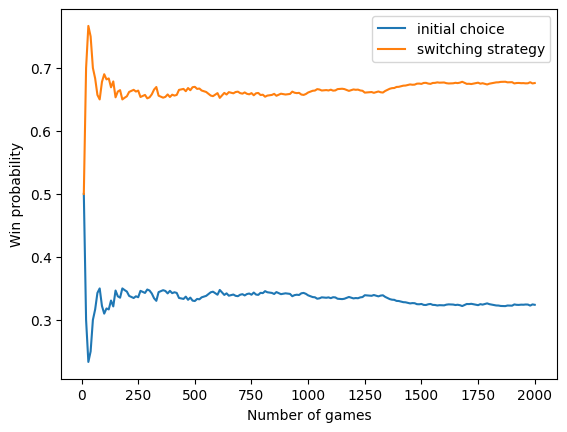

In [11]:
# Посмотрим, как изменялась оценка вероятности выигрыша.
games_played, wins_initial_choice, wins_switching_strategy = simulation.record_history(count=10, batches=200)
wins_ratio_initial_choice = wins_initial_choice / games_played
wins_ratio_switching_strategy = wins_switching_strategy / games_played
plt.plot(games_played, wins_ratio_initial_choice, label='initial choice')
plt.plot(games_played, wins_ratio_switching_strategy, label='switching strategy')
plt.xlabel("Number of games")
plt.ylabel("Win probability")
plt.legend()
plt.show()

## Байесовское оценивание

В примере выше мы видели, что условные вероятности и [формула Байеса](https://ru.wikipedia.org/wiki/Теорема_Байеса) позволяют точно вычислить вероятность событий при известной дополнительной информации. 
Однако формулу Байеса также используют в [Байесовском выводе](https://ru.wikipedia.org/wiki/Байесовский_вывод), когда вместо безусловных вероятностей используют наши априорные представления о действительности, которые затем переоцениваются при поступлении новой информации. 

В качестве простого примера рассмотрим задачу, в которой необходимо оценить вероятность некоторого события.
Пусть у нас есть монета, которая при подкидывании падает либо орлом, либо решкой, причем вероятность выпадание орла $\theta$, а вероятность выпадания решки $1-\theta$. 
Наша задача вычислить вероятность $\theta$, для этого у нас есть единственный инструмент: мы можем подбрасывать монету произвольное количество раз и наблюдать, сколько раз она выпала орлом. 
Все подбрасывания считаются независымими, и исход одного броска никак не влияет на исход другого.

Согласно [статистической интерпретации вероятностей](https://ru.wikipedia.org/wiki/Частотная_вероятность), вероятность выпадания орла равна доле выпаданий орла в общей совокупности бросков при числе бросков стремящемся к бесконечности. Тогда приближенно:
$$\theta\approx R=\frac{W}{N},$$
где $N$ -- число бросков и $W$ -- число выпаданий орла.
Если повтроять эксперимент с $N$ бросками монеты несколько раз, то $W$ будет получать разным в разных испытаниях.
Более точно, величина $W$ является случайной и [распределенной биномиально](https://ru.wikipedia.org/wiki/Биномиальное_распределение):
$$
P(W=k)=C_N^k \theta^k (1-\theta)^{N-k}.
$$
Мода этого распределения равна целой части от $\theta(N+1)$, т.е. чаще всего $W$ будет принимать значения близкие к предсказанию $\theta N$, дающему желаемую частоту $\theta$ выпадения орла.
Разброс значений $W$ однако велик, а именно дисперсия биномиального распределения равна $D[W]=Np_0(1-p_0)$.
Среднеквадратическое отклонение для частоты $R$ таким образом равно:
$$\sigma(R)=\sqrt{\frac{\theta(1-\theta)}{N}}.$$
Разброс оценки вероятности выпадения орла уменьшается с увеличением числа бросков, однако делает это очень медленно. 


Другим способом оценивания вероятности является Байесовский вывод.
Предположим, что у нас есть исходное предположение, что монетка честная, т.е. вероятность выбросить орла $\theta=\frac12$. 
Допустим, что мы допускаем, что вероятны небольшие отклонения симметрии монетки, и монета может выпадать одной стороной чаще, но мы не знаем какой.
Формализуем наши убеждения, положив, что вероятность выпадания орла есть случайная величина $\Theta$ распределенная на интервале $[0,1]$ согласно [бета-распределению](https://en.wikipedia.org/wiki/Beta_distribution) с параметрами $\alpha=\beta$,
что соответствует моде, медиане и мат. ожиданию равным $\Theta=\frac12$.
Выбор величины $\alpha$ позволяет задать среднеквадратическое отклонение величины $\Theta$, выражающее наше ощущение величины отклонения вероятности выпадания орла от 50%.
Например, $\alpha=1$ соответствует отклонению:
$$
\sigma(\Theta)=\frac{1}{2\sqrt{2\alpha+1}}=\frac{1}{\sqrt{12}}\approx 29\%.
$$
Чтобы уточнить значение $\theta$, мы проведем $N$ испытаний и посчитаем, сколько раз выпадет орел $W$.
Вероятность выпадания $W=k$ орлов при заданном $\theta$ описывается биномиальным распределением:
$$P(W=k|\Theta=\theta)=C_N^k\theta^k(1-\theta)^{N-k}.$$
Формула Байеса позволяет переставить местами условие и заключение, тем самым оценив распределение $\Theta$, если мы знаем, сколько раз выпал орел в испытаниях:
$$\rho(\Theta=\theta|W=k) = \frac{P(W=k|\Theta=\theta)\rho(\Theta=\theta)}{P(W=k)},$$
где мы использовали плотности распределений $\rho$ для непрерывных величин и вероятности $P$ для дискретных.
Так как мы не знаем значение $\theta$ точно, то чтобы найти знаменатель, нужно проинтегрировать по всем гипотезам по формуле полной вероятности:
$$
P(W=k)=\int_{-\infty}^{\infty}P(W=k|\Theta=\theta)\rho(\Theta=\theta)d\theta
=\frac{C_N^k}{B(\alpha,\beta)}\int_{-\infty}^{\infty}\theta^{\alpha-1}(1-\theta)^{\beta-1}
\theta^{k}(1-\theta)^{N-k}d\theta. 
$$
Знаменатель нужен только для нормировки распределения вероятности на единицу, для оценки параметров достаточно расмотреть числитель.
Теперь плотность распределения вероятности для значений $\theta$ при наличии новых данных выглядит следующим образом:
$$
P(W=k|\Theta=\theta)=\mathrm{const}\cdot \theta^{k+\alpha-1}(1-\theta)^{N-k+\beta-1}.
$$
Значит после переоценки вероятности $\Theta$ по прежнему описывается бета-распределением, но с новыми параметрами:
$$
\alpha\mapsto \alpha'=\alpha+k,\quad
\beta\mapsto \beta'=\beta+N-k.
$$
Наиболее вероятное значение $\theta$ теперь:
$$
\theta=\frac{\alpha'-1}{\alpha'+\beta'-2}
=\frac{\alpha+k-1}{\alpha+k+\beta+N-k-2}
=\frac{\alpha+k-1}{2\alpha+N-2}.
$$
Отметим, что априорное предположение оставило свой вклад в результате.
Даже при априорном предположении честности монеты,
исходная убежденность в верности априорного предположения (величина $\alpha$) 
определяет, как сильно влияет результат измерений на ответ.
Интересно отметить, что при $\alpha=1$ результат Байесовского оценивания совпадает 
со статистическим определением вероятности выше. 

Еще одним способом оценивания является метод [максимального правдоподобия](https://ru.wikipedia.org/wiki/Метод_максимального_правдоподобия). 
Пусть при $N$ испытаниях орел выпал $W=k$ раз.
Функция правдоподобия равна вероятности получить такой исход при заданном значении $\theta$:
$$L[\theta]=\mathrm{const}\cdot \theta^k(1-\theta)^{N-k}.$$
Согласно оценке максимального правдоподобия параметр $\theta$ выбирается таким, 
чтобы максимизировать функцию правдоподобия.
Вместо функции правдоподобия удобно рассматривать ее логарифм, который достигает максимума в той же точке, что и сама функция правдоподобия:
$$\log L = \mathrm{const}+k\log\theta+(N-k)\log(1-\theta).$$
Максимум является стационарной точкой, следовательно должен удовлетворять уравнению:
$$
\frac{d}{d\theta}=\frac{k}{\theta}-\frac{N-k}{1-\theta}=0,
$$
откуда $\theta=\frac{k}{N}$.
Таким образом, статистическое определение вероятности совпадает с оценкой максимального правдоподобия для биномиального распределения. 

### Задания.

1. Найдите вероятность выпадения точно $W=[\theta(N+1)]$ орлов при $N$ бросках монеты при $N\to\infty$. 
Как часто вы думаете, частота выпадения орла совпадает с вероятностью выпадения орла? С какой вероятностью выпадет орел после 1000 выпаданий решки?

2. Проведите симуляцию и постройти график убывания ошибки оценивания вероятности выпадания орла $\theta$ через частоту выпадания орла $R$ как функцию от числа бросков $N$. Сколько бросков нужно сделать, чтобы найти вероятность со среднеквадратической погрешностью в 1%?

3. Сколько нужно провести испытаний, чтобы отклонение истинного $\theta$ от оценки через частоту выпадения орла $R$ было менее 1% с вероятностью 99%?

4. С какой скоростью байесовская оценка вероятности сходится к истинному значению? Насколько точной должна быть начальная оценка, чтобы байесовская оценка была точнее, чем оценка максимального правдоподобия?

5. Допустим, что мы сделали $N$ испытаний и использовали их для корректировки начального распределения вероятности $\Theta$. Можем ли мы повторно использовать результаты испытаний, чтобы еще раз уточнить значение $\Theta$?
Что произойдет, если мы будем повторять оценивание с одними и теми же результатами испытаний многократно?
Имеет ли смысл разбить $2N$ испытаний на две части по $N$ испытаний и провести байесовское оценивание в два шага, или лучше сделать одну оценку, используя все данные сразу?
